In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data/mandarine-dataset/explicit_ratings_en.csv')

##### Dataset Structure & Overview

In [13]:
print("--- Head of DataFrame ---")
print(df.head())

# Display the last 5 rows of the DataFrame
print("\n--- Tail of DataFrame ---")
print(df.tail())

# Get a concise summary of the DataFrame, including data types and non-null values
print("\n--- DataFrame Info ---")
df.info()

# Generate descriptive statistics of numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())

# Check for missing values in each column
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Display the number of unique values for each column
print("\n--- Unique Values per Column ---")
print(df.nunique())


--- Head of DataFrame ---
   user_id  item_id  watch_percentage           created_at  rating
0   224557      510               100  2018-09-28 16:18:29      10
1   224557      615               100  2018-09-28 16:22:22      10
2   224557     7680               100  2018-09-28 16:23:34      10
3   224293      510               100  2018-09-28 17:20:30      10
4   224293      515               100  2018-09-28 17:40:02      10

--- Tail of DataFrame ---
      user_id  item_id  watch_percentage           created_at  rating
3654   605220   376915               100  2021-07-30 16:48:48      10
3655   605220   376916               100  2021-07-30 16:50:28      10
3656   605220   376924               100  2021-07-30 16:53:11      10
3657   605220   376925               100  2021-07-30 16:54:43      10
3658   605220   376929               100  2021-07-30 16:56:22      10

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 5 colum


--- Histograms of Numerical Features ---


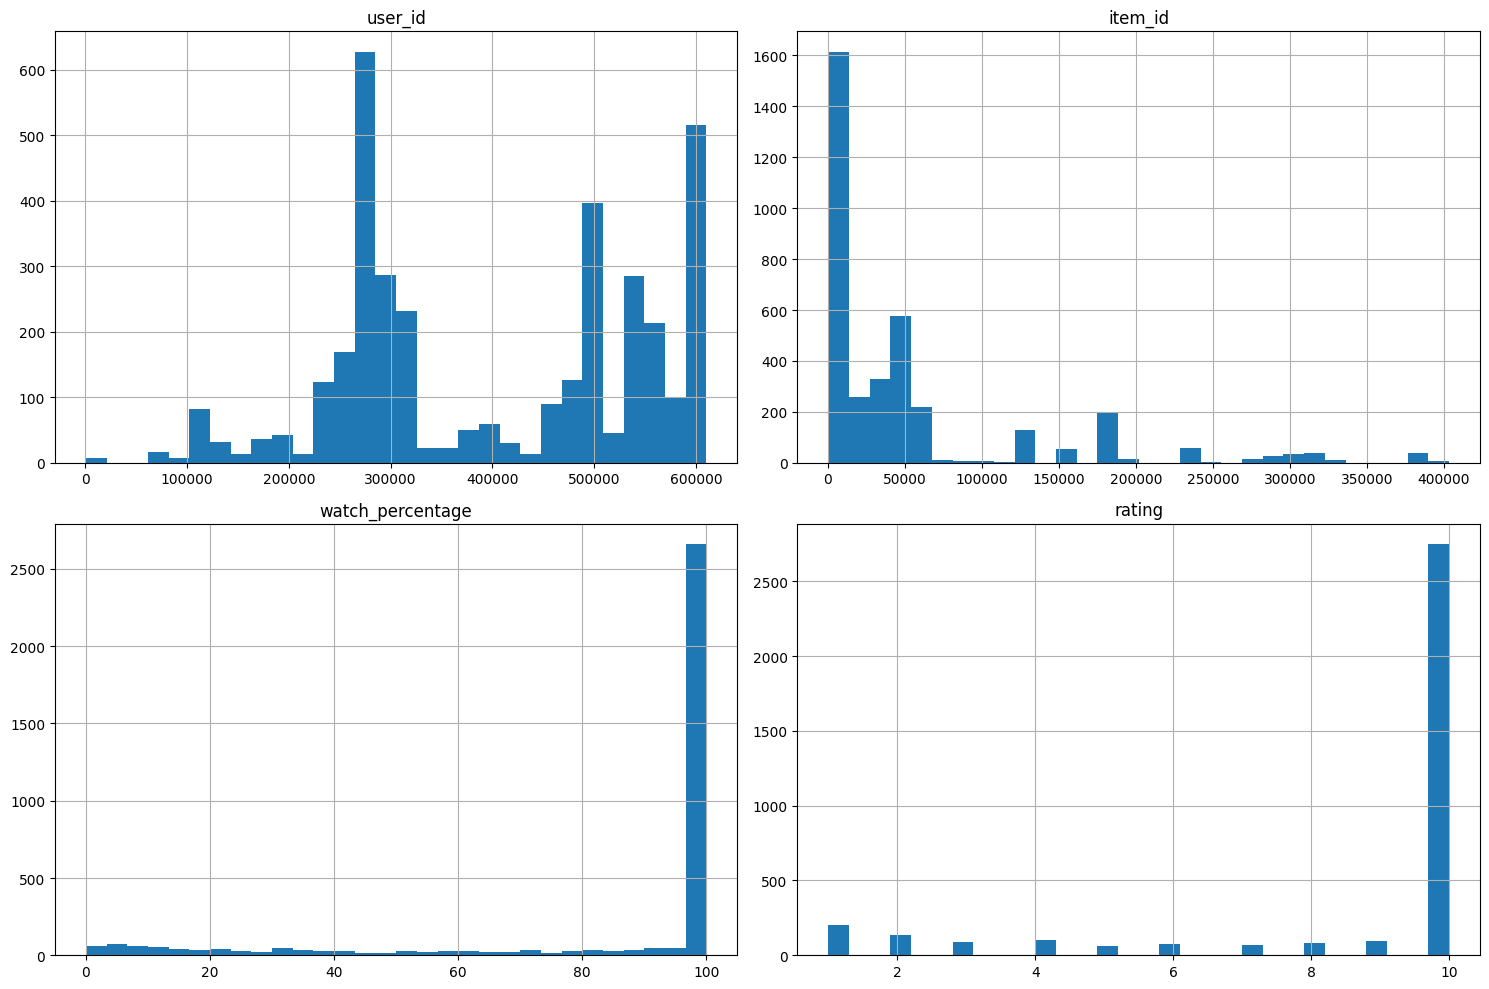


--- Correlation Matrix ---


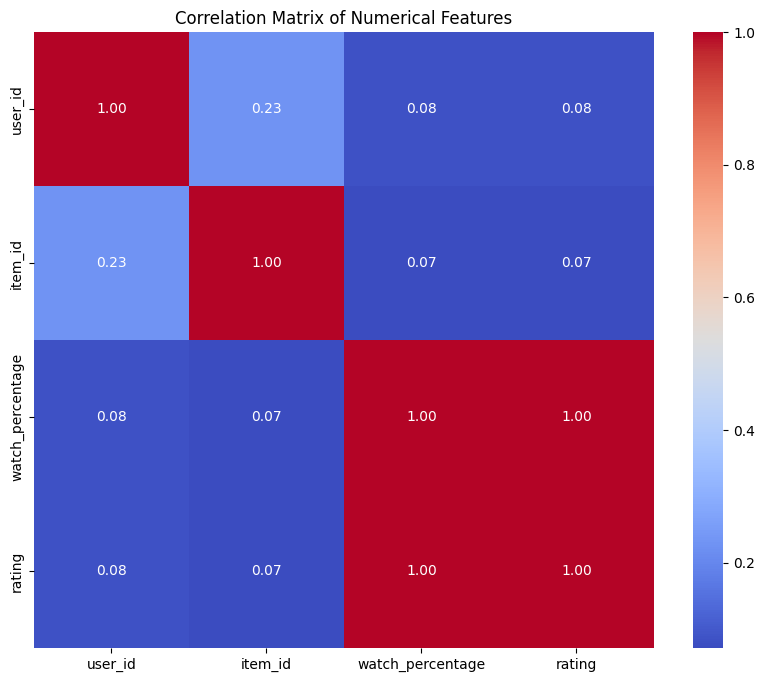

In [14]:
# Visualize the distribution of numerical columns using histograms
print("\n--- Histograms of Numerical Features ---")
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

# Plot correlation matrix for numerical features
print("\n--- Correlation Matrix ---")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [15]:
# What is the exact start and end date of the data collection?
print(f"Dataset Start Date: {df['created_at'].min()}")
print(f"Dataset End Date: {df['created_at'].max()}")

Dataset Start Date: 2018-09-28 14:38:15
Dataset End Date: 2021-09-20 16:26:06


In [16]:
# Calculate the total number of unique user_ids
num_unique_users = df['user_id'].nunique()

# Calculate the total number of unique item_ids
num_unique_items = df['item_id'].nunique()

# Calculate the total number of interactions (rows in the DataFrame)
total_interactions = len(df)

print(f"Total unique users: {num_unique_users}")
print(f"Total unique items: {num_unique_items}")
print(f"Total interactions: {total_interactions}")


Total unique users: 822
Total unique items: 776
Total interactions: 3659


In [17]:
# Check for null values in specified columns
print(df[['watch_percentage', 'rating', 'created_at']].isnull().sum())

watch_percentage    0
rating              0
created_at          0
dtype: int64


##### Interaction Quality (Ratings & Watch Time)

In [18]:
# Assuming you have a DataFrame 'df' with 'user_id' and 'item_id' columns
n_users = df['user_id'].nunique()
n_items = df['item_id'].nunique()
n_interactions = df.shape[0]

sparsity = 1 - (n_interactions / (n_users * n_items))
print(f"Sparsity: {sparsity:.4%}")


Sparsity: 99.4264%


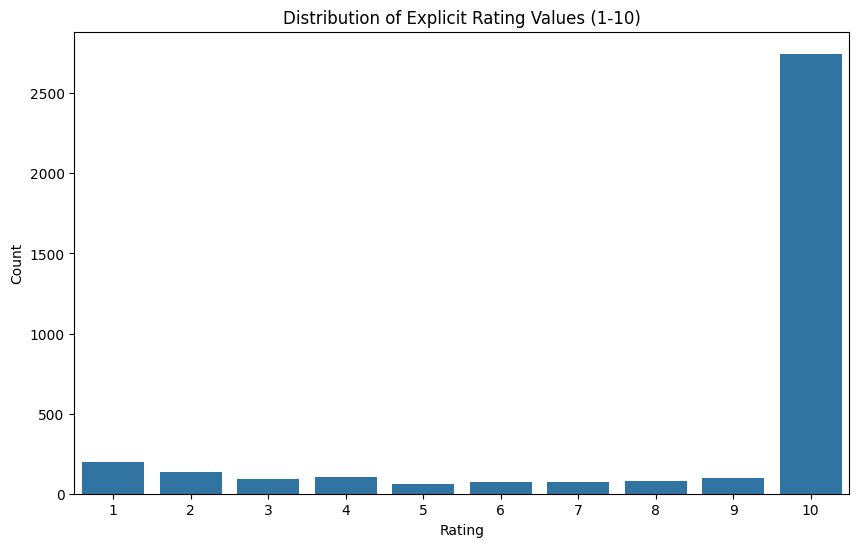

Skewness of ratings: -1.7716740771788064
The distribution is negatively skewed (skewed towards higher/positive ratings).


In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Explicit Rating Values (1-10)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Calculate skewness
print(f"Skewness of ratings: {df['rating'].skew()}")
if df['rating'].skew() < 0:
    print("The distribution is negatively skewed (skewed towards higher/positive ratings).")
else:
    print("The distribution is positively skewed (skewed towards lower ratings) or symmetric.")


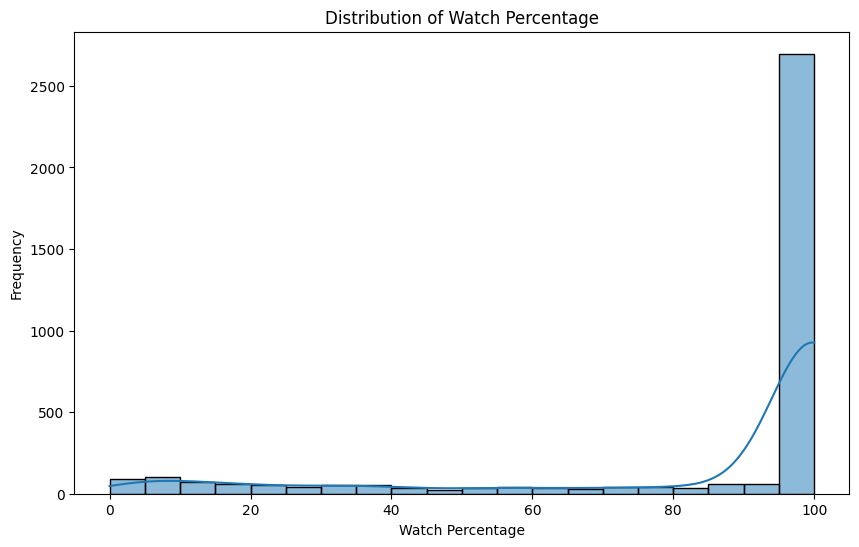

Percentage of sessions with 100% watch time: 99.70%
count    3659.000000
mean       84.390817
std        30.120331
min         0.000000
25%        91.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: watch_percentage, dtype: float64


In [20]:
# Plot the distribution of watch_percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['watch_percentage'], bins=20, kde=True)
plt.title('Distribution of Watch Percentage')
plt.xlabel('Watch Percentage')
plt.ylabel('Frequency')
plt.show()

# Calculate the percentage of sessions where users watched 100% of the content
# Assuming 1.0 represents 100% (or adjust to 100 if the scale is 0-100)
full_watch_count = df[df['watch_percentage'] >= 1.0].shape[0]
total_count = df.shape[0]
print(f"Percentage of sessions with 100% watch time: {(full_watch_count / total_count) * 100:.2f}%")

# Quick statistics to see the spread
print(df['watch_percentage'].describe())


In [21]:
#  Is there a strong correlation between watch_percentage and rating? (e.g., does 100% watch time always mean a 10/10 rating?)
df[['watch_percentage', 'rating']].corr()

,watch_percentage,rating
watch_percentage,1.000000,0.997903
rating,0.997903,1.000000


In [ ]:
# Should interactions with very low watch_percentage (e.g., < 5%) 
# or low rating be treated as negative samples 
# or removed entirely?

# Remove interactions with very low watch_percentage or low rating entirely
# Assuming 'df' is your DataFrame and 'watch_percentage' is a float (e.g., 0.05 for 5%)
# and 'rating' is an integer/float where lower values indicate lower ratings.
# Adjust the rating threshold (e.g., < 2) based on your specific rating scale and definition of "low".
df_cleaned = df[
    ~((df['watch_percentage'] < 0.05) | (df['rating'] < 2))
].copy()


In [26]:
# Create pivot table
pivot_df = df.pivot_table(index='user_id', columns='item_id', values='rating', fill_value=0)
pivot_df 

item_id,510,511,512,513,514,515,516,526,527,528,...,385088,385089,385090,385091,393125,393132,403215,403216,403217,403218
user_id,,,,,,,,,,,,,,,,,,,,,
672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4160,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
